# Time Series of Heat Wave Load and Temperature by Balancing Authority

This notebook plots the time series of hourly temperatures and loads by BA during a heat wave event.

In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from datetime import timedelta


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
ba_weather_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Production_Runs/tell_data/wrf_to_tell_data/'
load_dir = '/Users/burl878/Documents/Code/code_repos/heat_wave_load_visualization/data/tell_output/'
image_output_dir = '/Users/burl878/Documents/Code/code_repos/heat_wave_load_visualization/plots/'


## Process the Historical Temperature Time Series by BA


In [3]:
# Define a function to compute the mean temperature as a function of time of day and day of year:
def process_temperature_time_series(ba_to_process: str, climate_scenario: str, ba_weather_dir: str):
    
    # Loop over the years from the 1980 to 2019:
    for year in range(1980,2020,1):
        if year <= 2019:
           # Create the filename for the given BA and year combination:
           filename = (ba_weather_dir + 'historic/' + ba_to_process + '_WRF_Hourly_Mean_Meteorology_' + str(year) + '.csv')
        else:
           # Create the filename for the given BA and year combination:
           filename = (ba_weather_dir + 'historic_2020_2022/' + ba_to_process + '_WRF_Hourly_Mean_Meteorology_' + str(year) + '.csv') 
    
        # Read in the .csv file:
        met_df = pd.read_csv(filename)
    
        # Set the time variable as an index:
        met_df['Time_UTC'] = pd.to_datetime(met_df['Time_UTC'])
        
        # Convert the temperature from Kelvin to Fahrenheit:
        met_df['T2'] = (1.8 * (met_df['T2'] - 273)) + 32
    
        # Compute the day and hour of the year to be used in averaging:
        met_df['Day_of_Year'] = met_df['Time_UTC'].dt.dayofyear
        
        # Add a column with the year values to be used in grouping:
        met_df['Year'] = year
        met_df['Hour_of_Day'] = met_df['Time_UTC'].dt.hour
            
        # Only keep the variables we need:
        met_df = met_df[['Time_UTC', 'Year', 'Day_of_Year', 'Hour_of_Day', 'T2']].copy()
        
        # Aggregate the output into a new dataframe:
        if year == 1980:
           ba_output_df = met_df
        else:
           ba_output_df = pd.concat([ba_output_df, met_df])
    
    # Loop over the first future iteration of the climate forcing:
    for year in range(1980,2020,1):
        filename = (ba_weather_dir + climate_scenario + '/' + ba_to_process + '_WRF_Hourly_Mean_Meteorology_' + str(year+40) + '.csv')
            
        # Read in the .csv file:
        met_one_df = pd.read_csv(filename)
        
        # Set the time variable as an index:
        met_one_df['Time_UTC'] = pd.to_datetime(met_one_df['Time_UTC'])
        
        # Convert the temperature from Kelvin to Fahrenheit:
        met_one_df['T2_Future_One'] = (1.8 * (met_one_df['T2'] - 273)) + 32
    
        # Compute the day and hour of the year to be used in averaging:
        met_one_df['Day_of_Year'] = met_one_df['Time_UTC'].dt.dayofyear
        
        # Add a column with the year values to be used in grouping:
        met_one_df['Year'] = year
        met_one_df['Hour_of_Day'] = met_one_df['Time_UTC'].dt.hour
            
        # Only keep the variables we need:
        met_one_df = met_one_df[['Year', 'Day_of_Year', 'Hour_of_Day', 'T2_Future_One']].copy()
        
        # Aggregate the output into a new dataframe:
        if year == 1980:
           met_one_output_df = met_one_df
        else:
           met_one_output_df = pd.concat([met_one_output_df, met_one_df])
    
    # Merge the historical and future dataframes together:
    ba_output_df = ba_output_df.merge(met_one_output_df, on=['Year', 'Day_of_Year', 'Hour_of_Day'], how='left')
    
    # Loop over the second future iteration of the climate forcing:
    for year in range(1980,2020,1):
        filename = (ba_weather_dir + climate_scenario + '/' + ba_to_process + '_WRF_Hourly_Mean_Meteorology_' + str(year+80) + '.csv')
            
        # Read in the .csv file:
        met_two_df = pd.read_csv(filename)
        
        # Set the time variable as an index:
        met_two_df['Time_UTC'] = pd.to_datetime(met_two_df['Time_UTC'])
        
        # Convert the temperature from Kelvin to Fahrenheit:
        met_two_df['T2_Future_Two'] = (1.8 * (met_two_df['T2'] - 273)) + 32
    
        # Compute the day and hour of the year to be used in averaging:
        met_two_df['Day_of_Year'] = met_two_df['Time_UTC'].dt.dayofyear
        
        # Add a column with the year values to be used in grouping:
        met_two_df['Year'] = year
        met_two_df['Hour_of_Day'] = met_two_df['Time_UTC'].dt.hour
            
        # Only keep the variables we need:
        met_two_df = met_two_df[['Year', 'Day_of_Year', 'Hour_of_Day', 'T2_Future_Two']].copy()
        
        # Aggregate the output into a new dataframe:
        if year == 1980:
           met_two_output_df = met_two_df
        else:
           met_two_output_df = pd.concat([met_two_output_df, met_two_df])
    
    # Merge the historical and future dataframes together:
    ba_output_df = ba_output_df.merge(met_two_output_df, on=['Year', 'Day_of_Year', 'Hour_of_Day'], how='left')
    
    # Compute the mean temperature as a function of time of day and day of year:
    ba_output_df['Mean_T2'] = ba_output_df.groupby(['Day_of_Year', 'Hour_of_Day'])['T2'].transform('mean').round(2)
    
    return ba_output_df


In [4]:
output_df = process_temperature_time_series(ba_to_process = 'LDWP', climate_scenario = 'rcp85hotter_ssp5', ba_weather_dir = ba_weather_dir)

output_df


,Time_UTC,Year,Day_of_Year,Hour_of_Day,T2,T2_Future_One,T2_Future_Two,Mean_T2
0,1980-01-01 00:00:00,1980,1,0,58.046,NaN,NaN,53.79
1,1980-01-01 01:00:00,1980,1,1,55.742,56.300,60.494,49.70
2,1980-01-01 02:00:00,1980,1,2,54.392,55.238,59.756,48.42
3,1980-01-01 03:00:00,1980,1,3,53.600,54.770,59.432,47.74
4,1980-01-01 04:00:00,1980,1,4,53.024,54.140,59.270,47.25
...,...,...,...,...,...,...,...,...
350635,2019-12-31 19:00:00,2019,365,19,53.996,60.998,65.552,55.05
350636,2019-12-31 20:00:00,2019,365,20,55.166,62.402,66.902,56.16
350637,2019-12-31 21:00:00,2019,365,21,55.580,62.996,67.244,56.79
350638,2019-12-31 22:00:00,2019,365,22,55.364,62.960,67.514,56.85


In [21]:
# Define a function to plot the heat wave hourly temperatures:
def plot_temperature_time_series(ba_to_process: str, climate_scenario: str, start_date: str, end_date: str, ba_weather_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Process the temperature time series:
    ba_hourly_df = process_temperature_time_series(ba_to_process = ba_to_process, climate_scenario = climate_scenario, ba_weather_dir = ba_weather_dir)
    
    # Set the 'Time_UTC' value as a datetime variable:
    ba_hourly_df['Time_UTC'] = pd.to_datetime(ba_hourly_df['Time_UTC'])
    
    # Subset to just the time window you want to plot:
    ba_hourly_df = ba_hourly_df.loc[(ba_hourly_df['Time_UTC'] >= pd.to_datetime(start_date)) & (ba_hourly_df['Time_UTC'] <= pd.to_datetime(end_date))]
    
    # Compute and print out the peak temperatures:
    print(('The original peak temperature in ' + ba_to_process + ' was ' + str(ba_hourly_df['T2'].max().round(1)) + ' F.'))
    print(('The future one peak temperature in ' + ba_to_process + ' was ' + str(ba_hourly_df['T2_Future_One'].max().round(1)) + ' F - a difference of ' + str((ba_hourly_df['T2_Future_One'].max() - ba_hourly_df['T2'].max()).round(1)) + ' F from the original.'))
    print(('The future two peak temperature in ' + ba_to_process + ' was ' + str(ba_hourly_df['T2_Future_Two'].max().round(1)) + ' F - a difference of ' + str((ba_hourly_df['T2_Future_Two'].max() - ba_hourly_df['T2'].max()).round(1)) + ' F from the original.'))
        
    # Make the plot:
    plt.figure(figsize=(25, 20))
    plt.rcParams['font.size'] = 21
    
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['Mean_T2'], 'k-', linewidth=3, label='1980-2019 Mean')
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['T2'], '#2B7F9E', alpha=0.33, linewidth=3, label='2018')
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['T2_Future_One'], '#2B7F9E', alpha=0.66, linewidth=3, label='2058')
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['T2_Future_Two'], '#2B7F9E', linewidth=3, label='2098')
    plt.xlim([pd.to_datetime(start_date), pd.to_datetime(end_date)])
    plt.ylim([60, 110])
    plt.yticks([60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110])
    legend = plt.legend(loc='upper right', prop={'size': 24})
    legend.get_frame().set_alpha(None)
    plt.ylabel('Hourly Temperature [$^\circ$F]')
    plt.title(('Hourly Temperature in ' + ba_to_process))
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir, (ba_to_process + '_2018_Heat_Wave_Temperature.png')), 
                   dpi=image_resolution, bbox_inches='tight', facecolor='white')


The original peak temperature in LDWP was 94.0 F.
The future one peak temperature in LDWP was 98.3 F - a difference of 4.2 F from the original.
The future two peak temperature in LDWP was 104.1 F - a difference of 10.1 F from the original.


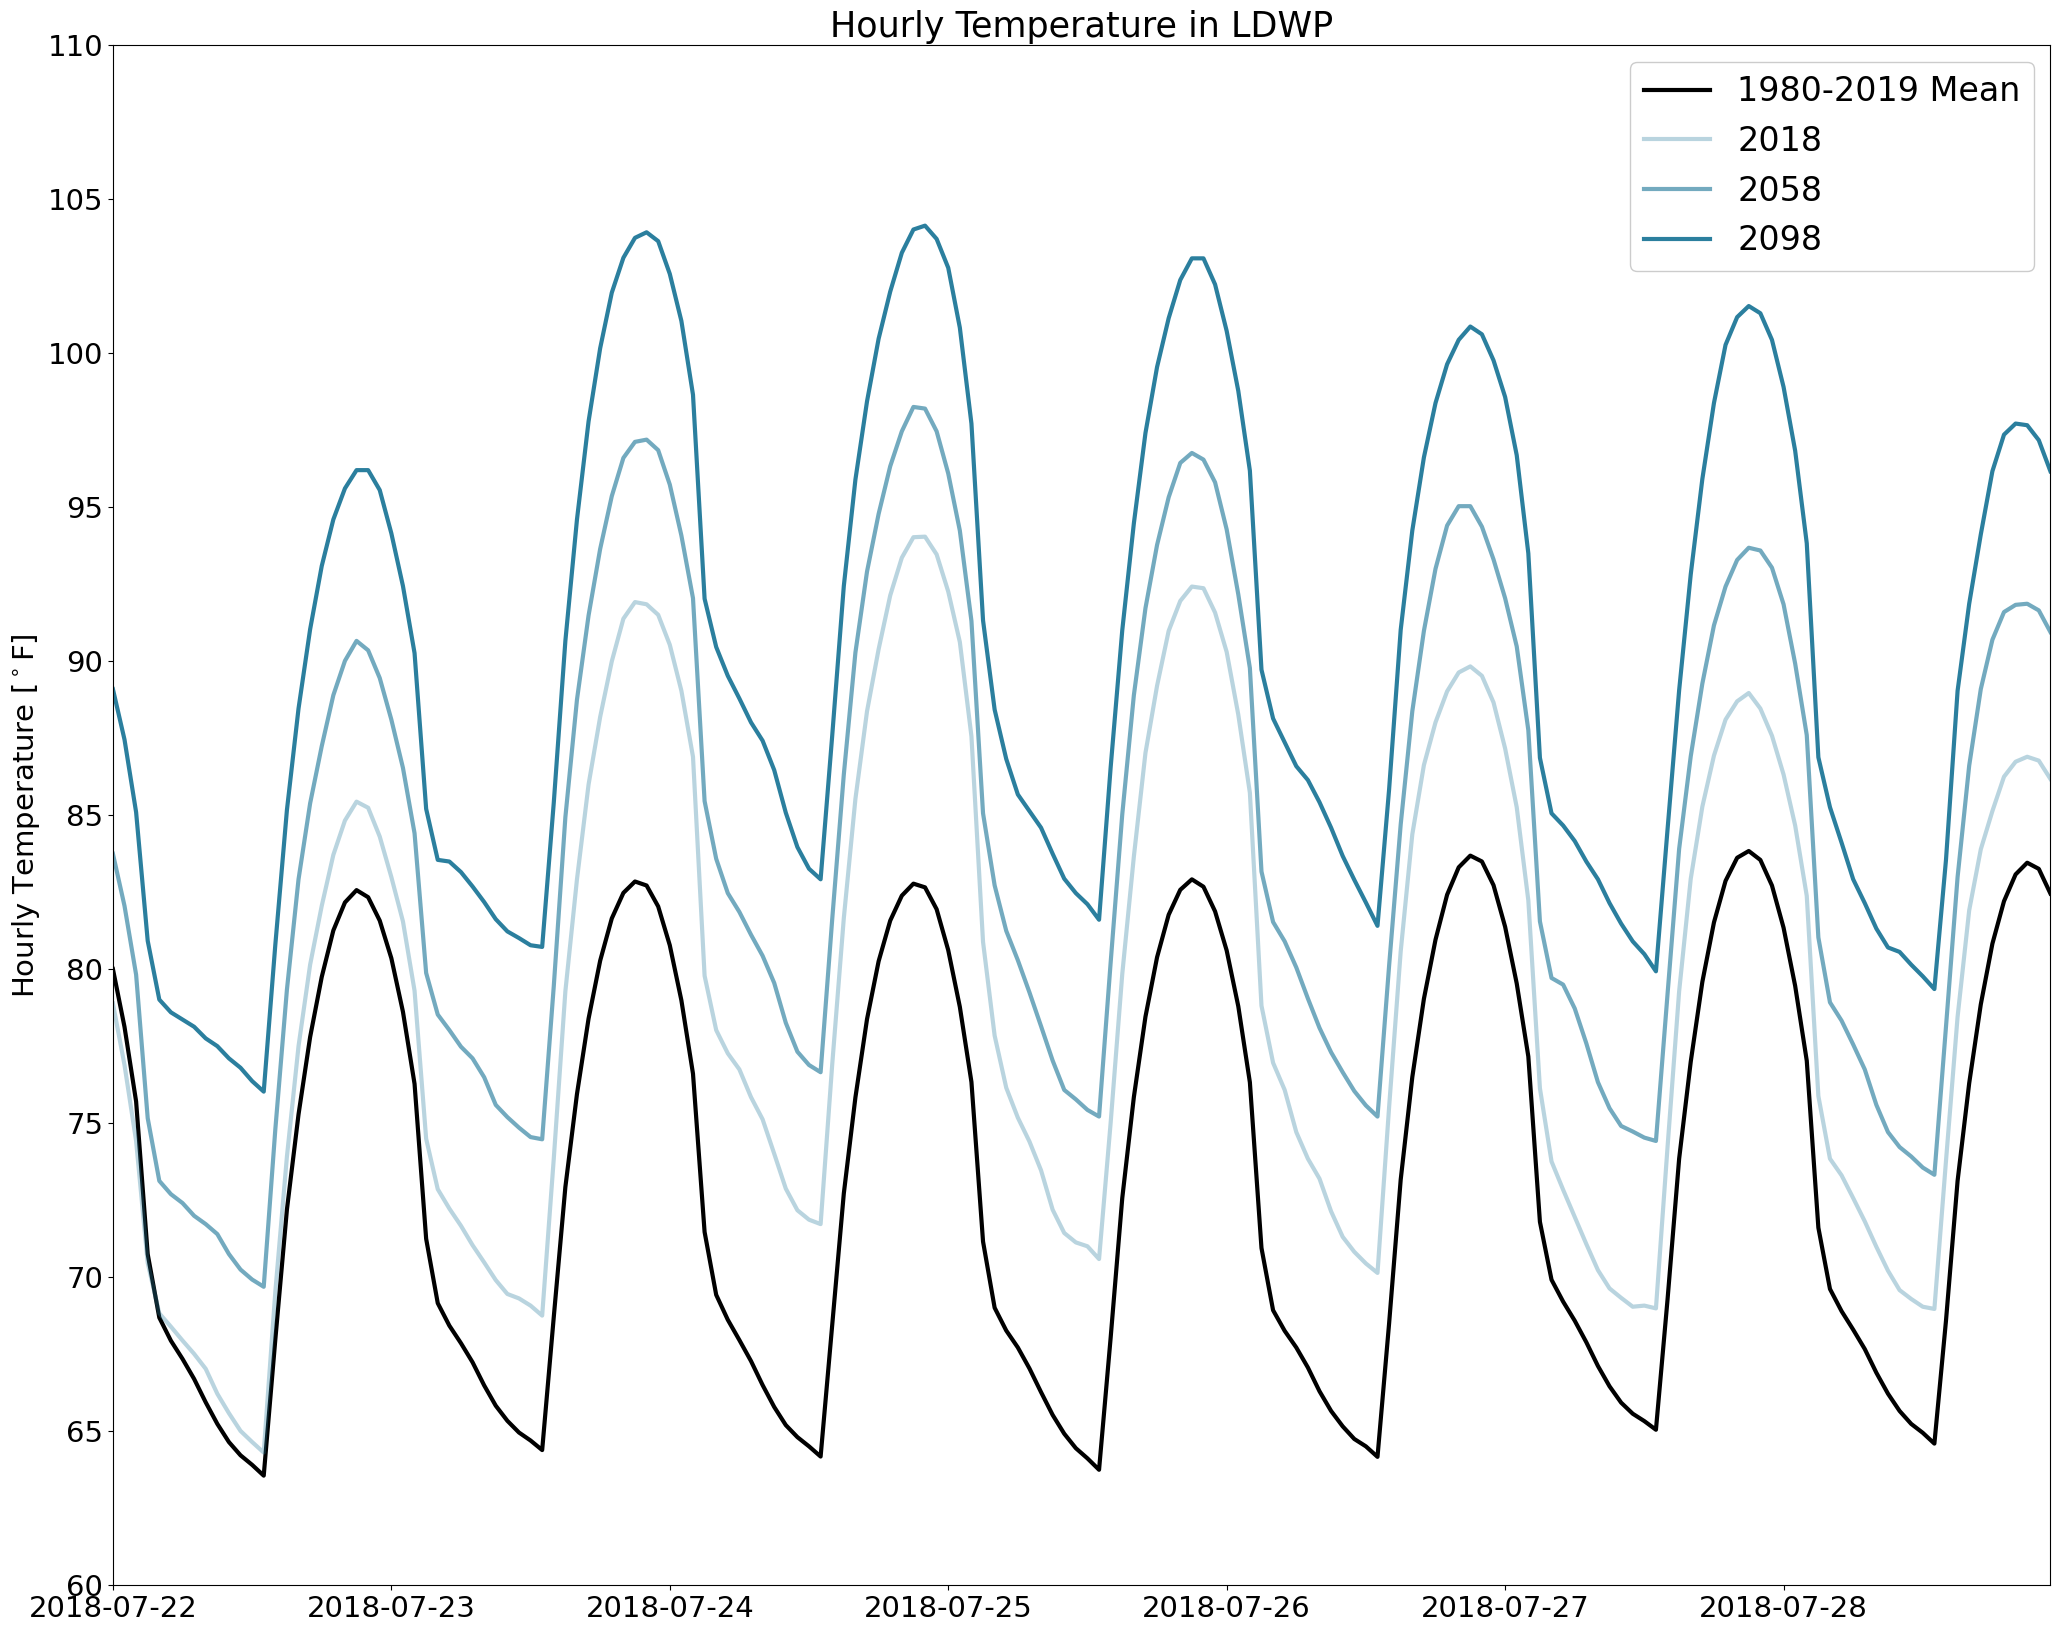

In [24]:
plot_temperature_time_series(ba_to_process = 'LDWP', 
                             climate_scenario = 'rcp85hotter_ssp5',
                             start_date = '2018-07-22 00:00:00',
                             end_date = '2018-07-28 23:00:00',
                             ba_weather_dir = ba_weather_dir,
                             image_output_dir = image_output_dir, 
                             image_resolution = 300, 
                             save_images = True)


In [25]:
# Define a function to plot the heat wave hourly loads:
def plot_load_time_series(ba_to_process: str, climate_scenario: str, start_date: str, end_date: str, load_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Read in the .csv for the base year loads:
    base_df = pd.read_csv((load_dir + 'historic/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2018_Scaled_2018.csv'))
    
    # Rename a few columns to make them more readable:
    base_df.rename(columns={'BA_Code': 'BA', 'Scaled_TELL_BA_Load_MWh': 'Load'}, inplace=True)
    
    # Set the time variable as an datetime variable:
    base_df['Time_UTC'] = pd.to_datetime(base_df['Time_UTC'])
    
    # Compute the day and hour of the year to be used in merging:
    base_df['Day_of_Year'] = base_df['Time_UTC'].dt.dayofyear
    base_df['Year'] = base_df['Time_UTC'].dt.year
    base_df['Hour_of_Day'] = base_df['Time_UTC'].dt.hour
    
    # Only keep the variables we need:
    base_df = base_df[['Time_UTC', 'Year', 'Day_of_Year', 'Hour_of_Day', 'BA', 'Load']].copy()
    
    # Read in the .csv for the first future year loads:
    future_one_df = pd.read_csv((load_dir + climate_scenario + '/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2018.csv'))
    
    # Rename a few columns to make them more readable:
    future_one_df.rename(columns={'BA_Code': 'BA', 'Scaled_TELL_BA_Load_MWh': 'Load_Future_One'}, inplace=True)
    
    # Set the time variable as an datetime variable:
    future_one_df['Time_UTC'] = pd.to_datetime(future_one_df['Time_UTC'])
    
    # Compute the day and hour of the year to be used in merging:
    future_one_df['Day_of_Year'] = future_one_df['Time_UTC'].dt.dayofyear
    future_one_df['Year'] = future_one_df['Time_UTC'].dt.year
    future_one_df['Hour_of_Day'] = future_one_df['Time_UTC'].dt.hour
    
    # Only keep the variables we need:
    future_one_df = future_one_df[['Day_of_Year', 'Hour_of_Day', 'BA', 'Load_Future_One']].copy()
    
    # Read in the .csv for the second future year loads:
    future_two_df = pd.read_csv((load_dir + climate_scenario + '/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2098_Scaled_2018.csv'))
    
    # Rename a few columns to make them more readable:
    future_two_df.rename(columns={'BA_Code': 'BA', 'Scaled_TELL_BA_Load_MWh': 'Load_Future_Two'}, inplace=True)
    
    # Set the time variable as an datetime variable:
    future_two_df['Time_UTC'] = pd.to_datetime(future_two_df['Time_UTC'])
    
    # Compute the day and hour of the year to be used in merging:
    future_two_df['Day_of_Year'] = future_two_df['Time_UTC'].dt.dayofyear
    future_two_df['Year'] = future_two_df['Time_UTC'].dt.year
    future_two_df['Hour_of_Day'] = future_two_df['Time_UTC'].dt.hour
    
    # Only keep the variables we need:
    future_two_df = future_two_df[['Day_of_Year', 'Hour_of_Day', 'BA', 'Load_Future_Two']].copy()
    
    # Merge the historical and future dataframes together:
    ba_hourly_df = base_df.merge(future_one_df, on=['BA', 'Day_of_Year', 'Hour_of_Day'], how='left')
    ba_hourly_df = ba_hourly_df.merge(future_two_df, on=['BA', 'Day_of_Year', 'Hour_of_Day'], how='left')
    
    # Set the 'Time_UTC' value as a datetime variable:
    ba_hourly_df['Time_UTC'] = pd.to_datetime(ba_hourly_df['Time_UTC'])
    
    # Subset to just the BA and time window you want to plot:
    ba_hourly_df = ba_hourly_df.loc[ba_hourly_df['BA'] == ba_to_process]
    ba_hourly_df = ba_hourly_df.loc[(ba_hourly_df['Time_UTC'] >= pd.to_datetime(start_date)) & (ba_hourly_df['Time_UTC'] <= pd.to_datetime(end_date))]
    
    # Compute and print out the peak loads:
    print(('The original peak load in ' + ba_to_process + ' was ' + str(ba_hourly_df['Load'].max()) + ' MW.'))
    print(('The future one peak load in ' + ba_to_process + ' was ' + str(ba_hourly_df['Load_Future_One'].max()) + ' MW - a difference of ' + str((ba_hourly_df['Load_Future_One'].max() - ba_hourly_df['Load'].max()).round(2)) + ' MW from the original.'))
    print(('The future two peak load in ' + ba_to_process + ' was ' + str(ba_hourly_df['Load_Future_Two'].max()) + ' MW - a difference of ' + str((ba_hourly_df['Load_Future_Two'].max() - ba_hourly_df['Load'].max()).round(2)) + ' MW from the original.'))
    
    # Make the plot:
    plt.figure(figsize=(25, 20))
    plt.rcParams['font.size'] = 21
    
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['Load'], '#2B7F9E', alpha=0.33, linewidth=3, label='2018')
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['Load_Future_One'], '#2B7F9E', alpha=0.66, linewidth=3, label='2058')
    plt.plot(ba_hourly_df['Time_UTC'], ba_hourly_df['Load_Future_Two'], '#2B7F9E', linewidth=3, label='2098')
    plt.xlim([pd.to_datetime(start_date), pd.to_datetime(end_date)])
    #plt.ylim([60, 105])
    legend = plt.legend(loc='upper right', prop={'size': 24})
    legend.get_frame().set_alpha(None)
    plt.ylabel('Hourly Load [MW]')
    plt.title(('Hourly Load in ' + ba_to_process))
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir, (ba_to_process + '_2018_Heat_Wave_Load.png')), 
                   dpi=image_resolution, bbox_inches='tight', facecolor='white')


The original peak load in CISO was 49122.82 MW.
The future one peak load in CISO was 50612.0 MW - a difference of 1489.18 MW from the original.
The future two peak load in CISO was 51058.46 MW - a difference of 1935.64 MW from the original.


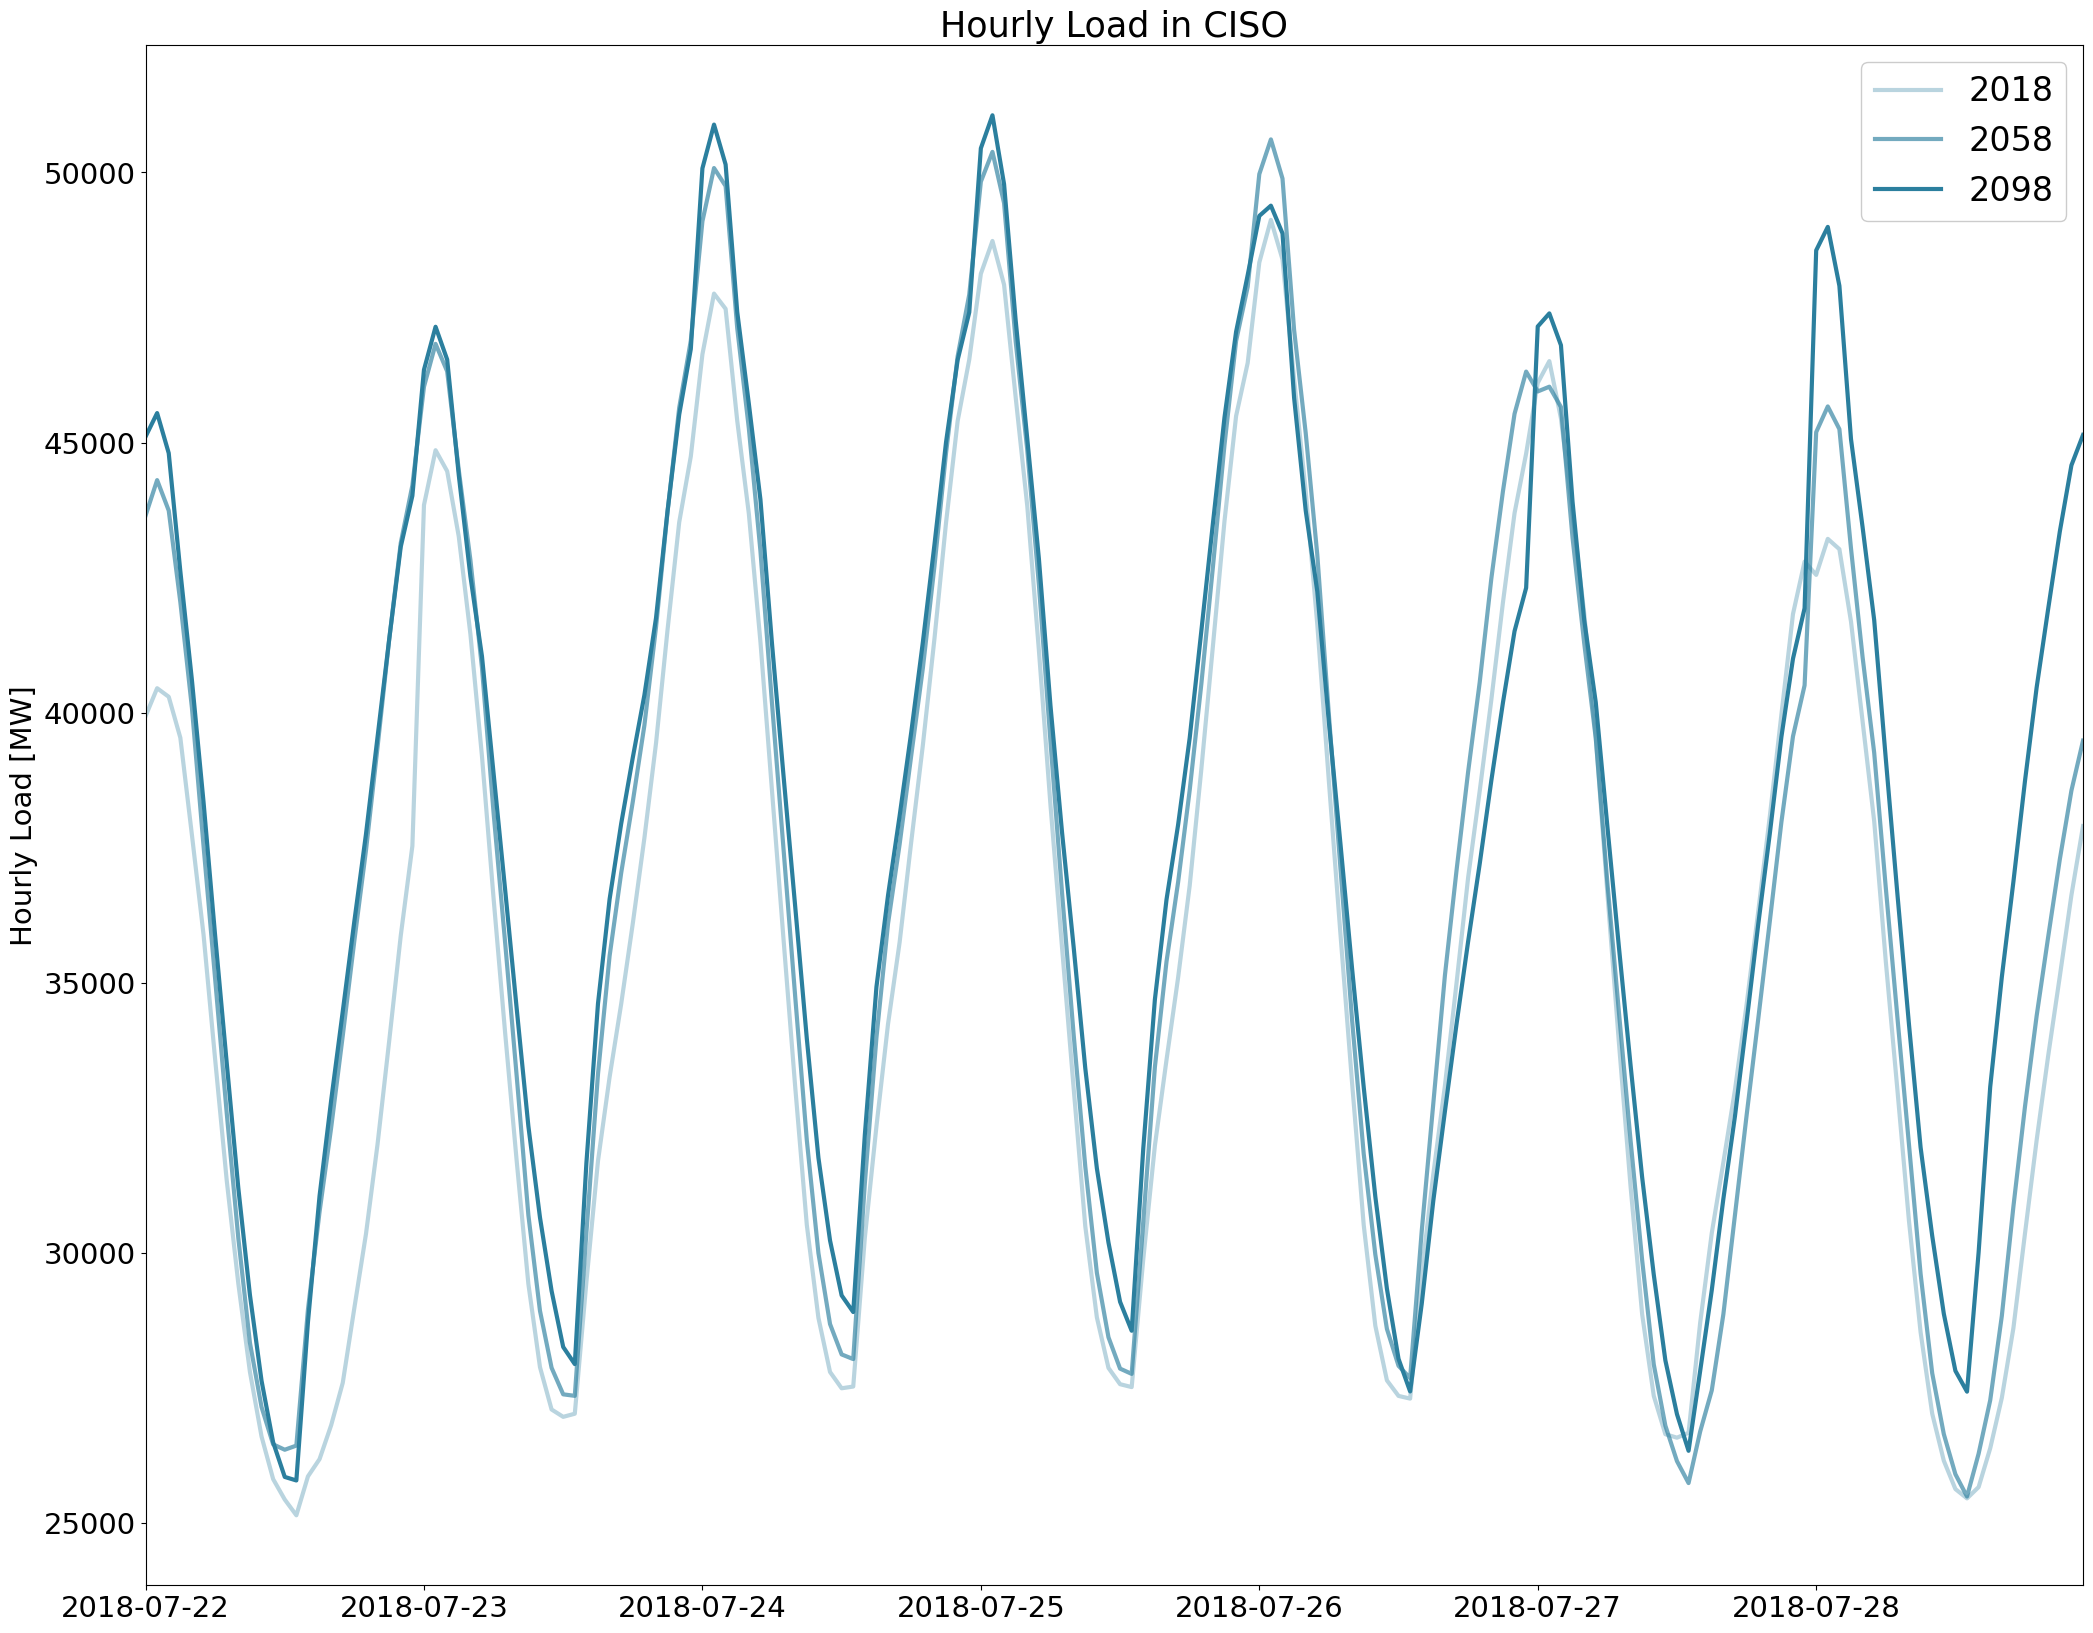

In [27]:
plot_load_time_series(ba_to_process = 'CISO', 
                      climate_scenario = 'rcp85hotter_ssp5', 
                      start_date = '2018-07-22 00:00:00',
                      end_date = '2018-07-28 23:00:00',
                      load_dir = load_dir,
                      image_output_dir = image_output_dir, 
                      image_resolution = 300, 
                      save_images = True)


In [19]:
# Read in the .csv for the base year loads:
load_df = pd.read_csv((load_dir + 'historic/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2018_Scaled_2018.csv'))
# load_df = pd.read_csv((load_dir + 'rcp85hotter_ssp5/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2018.csv'))
# load_df = pd.read_csv((load_dir + 'rcp85hotter_ssp5/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2098_Scaled_2018.csv'))
load_df = load_df.loc[load_df['BA_Code'] == 'AZPS']

print(('Total Load in AZPS = ' + str((0.001*load_df['Scaled_TELL_BA_Load_MWh'].sum()).round(2)) + ' GWh'))


Total Load in AZPS = 32402.96 GWh
